In [210]:
# builtin
import importlib
# internal
import read_data
import train_model
import params
from tqdm.contrib.concurrent import process_map
# external
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [211]:
importlib.reload(params)
importlib.reload(read_data)
importlib.reload(train_model)

<module 'train_model' from '/Users/shiyimin/Library/CloudStorage/OneDrive-个人/LLM Opt Pre/call/LGCN_v2/train_model.py'>

### original LGCN

In [148]:
res_dir = "./experiment_result/MBA/"
lgcn_dir = res_dir + "LGCN/"
tri_lgcn_dir = res_dir + "LGCN_tri/"
tri_lgcn_approach_dir = res_dir + "LGCN_tri_approach/"

In [126]:
assert params.all_para[2] == 'LGCN'
read_data_res = read_data.read_all_data_tri(params.all_para)
read_data_res[8].shape

In [129]:
# excel_path_list = [lgcn_dir + 'MBA_LGCN_20240509_1.xlsx', lgcn_dir + 'MBA_LGCN_20240509_2.xlsx', lgcn_dir + 'MBA_LGCN_20240509_3.xlsx',]
# def parallel_train_model(excel_path):
#     F1_max = train_model.train_model(params.all_para[:26], read_data_res, excel_path)
# results = process_map(parallel_train_model, excel_path_list)

In [130]:
F1_max = train_model.train_model(params.all_para[:26], read_data_res, lgcn_dir + 'MBA_LGCN_20240509_3.xlsx')

F1_max: 0.078480: 100%|████████████████████████████████████████████████████████| 200/200 [07:56<00:00,  2.38s/it]

time cost: 2.3813319368749943


### tri-partite graph LGCN

In [149]:
assert params.all_para[2] == 'LGCN_tri'
read_data_res_tri = read_data.read_all_data_tri(params.all_para)
read_data_res_tri[8].shape

Reading data...
Data all read successfully!


(8163, 128)

In [150]:
F1_max = train_model.train_model(params.all_para[:26], read_data_res_tri, tri_lgcn_dir + "MBA_LGCN_tri_20240509_3.xlsx")

F1_max: 0.089631: 100%|████████████████████████████████████████████████████████| 200/200 [07:59<00:00,  2.40s/it]

time cost: 2.3962498497900016


### analysis on the result

In [59]:
# lgcn_f1_df = pd.read_excel(lgcn_res, sheet_name='F1')
# lgcn_ndcg_df = pd.read_excel(lgcn_res, sheet_name='NDCG')

# lgcn_tri_approach_f1_df = pd.read_excel(tri_lgcn_approach_res, sheet_name='F1')
# lgcn_tri_approach_ndcg_df = pd.read_excel(tri_lgcn_approach_res, sheet_name='NDCG')

# lgcn_tri_f1_df = pd.read_excel(tri_lgcn_res, sheet_name='F1')
# lgcn_tri_ndcg_df = pd.read_excel(tri_lgcn_res, sheet_name='NDCG')

In [151]:
# lgcn
lgcn_paths = [lgcn_dir + "MBA_LGCN_20240509_1.xlsx",
              lgcn_dir + "MBA_LGCN_20240509_2.xlsx",
              lgcn_dir + "MBA_LGCN_20240509_3.xlsx"]
lgcn_f1_dfs = [pd.read_excel(path, sheet_name='F1') for path in lgcn_paths]
lgcn_ndcg_dfs = [pd.read_excel(path, sheet_name='NDCG') for path in lgcn_paths]

# lgcn_tri
lgcn_tri_paths = [tri_lgcn_dir + "MBA_LGCN_tri_20240509_1.xlsx",
                  tri_lgcn_dir + "MBA_LGCN_tri_20240509_2.xlsx",
                  tri_lgcn_dir + "MBA_LGCN_tri_20240509_3.xlsx"]
lgcn_tri_f1_dfs = [pd.read_excel(path, sheet_name='F1') for path in lgcn_tri_paths]
lgcn_tri_ndcg_dfs = [pd.read_excel(path, sheet_name='NDCG') for path in lgcn_tri_paths]

# lgcn_tri_approach
lgcn_tri_approach_paths = [tri_lgcn_approach_dir + "MBA_LGCN_tri_approach_20240509.xlsx",
                           tri_lgcn_approach_dir + "MBA_LGCN_tri_approach_20240509_2.xlsx",
                           tri_lgcn_approach_dir + "MBA_LGCN_tri_approach_20240509_3.xlsx"]
lgcn_tri_approach_f1_dfs = [pd.read_excel(path, sheet_name='F1') for path in lgcn_tri_approach_paths]
lgcn_tri_approach_ndcg_dfs = [pd.read_excel(path, sheet_name='NDCG') for path in lgcn_tri_approach_paths]

#### 1. compare f1

In [152]:
lgcn_f1_dfs[0].max(), lgcn_tri_approach_f1_dfs[0].max(), lgcn_tri_f1_dfs[0].max()

(Unnamed: 0    200.000000
 2               0.077271
 5               0.104943
 10              0.118432
 20              0.119420
 50              0.106815
 100             0.086684
 dtype: float64,
 Unnamed: 0    200.000000
 2               0.092127
 5               0.120546
 10              0.129987
 20              0.130115
 50              0.112596
 100             0.092790
 dtype: float64,
 Unnamed: 0    200.000000
 2               0.094581
 5               0.120903
 10              0.137500
 20              0.137318
 50              0.117305
 100             0.093290
 dtype: float64)

full improved rate from baseline: [0.1243495  0.1228128  0.14097108 0.12385295 0.08676069 0.06631286]
approach improved rate from baseline: [0.14240952 0.14944222 0.14669119 0.10951518 0.06280488 0.05691926]
full improved rate from approach: [-0.01580871 -0.02316725 -0.00498836  0.01292255  0.02254018  0.00888772]


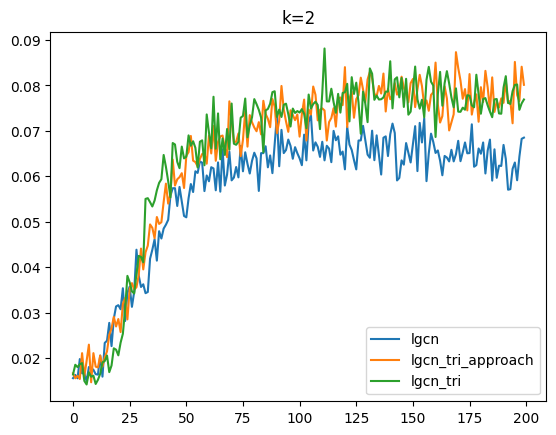

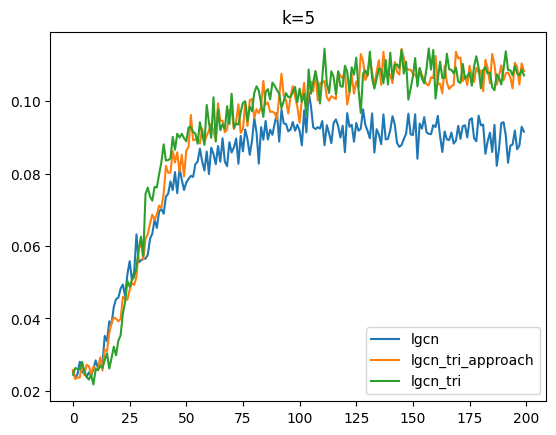

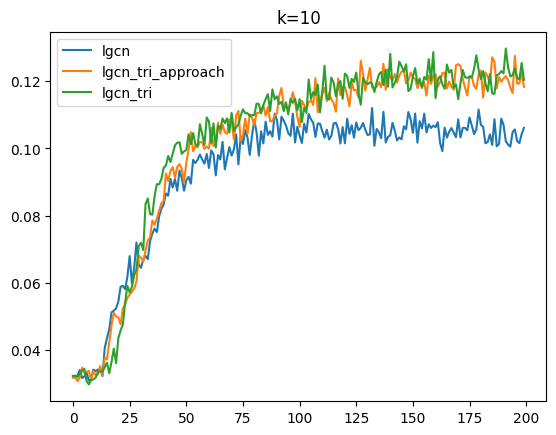

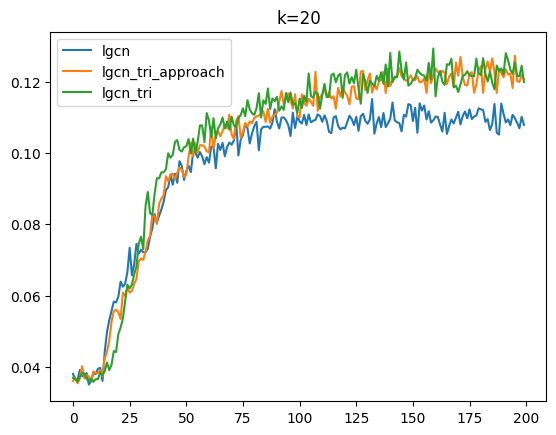

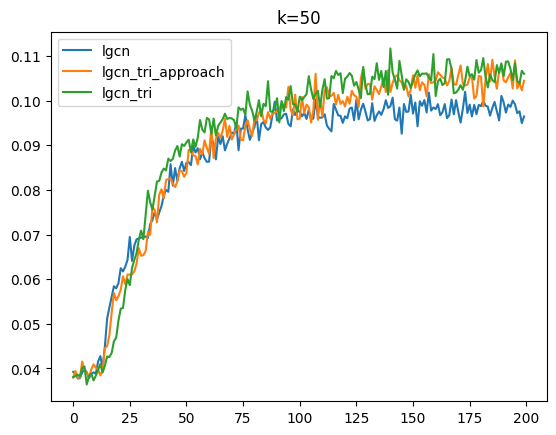

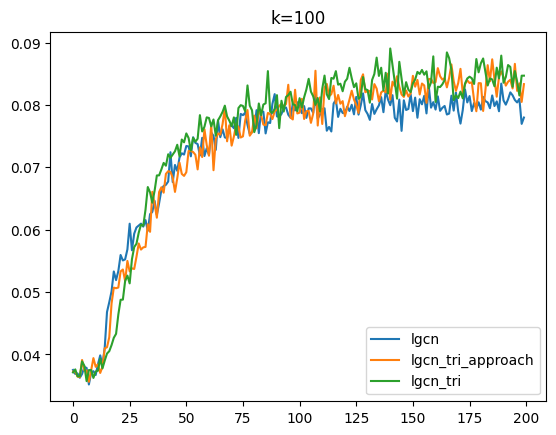

In [162]:
# 1. mean of max
a1 = np.mean([df.max().tolist()[1:] for df in lgcn_f1_dfs], axis=0)
a2 = np.mean([df.max().tolist()[1:] for df in lgcn_tri_approach_f1_dfs], axis=0)
a3 = np.mean([df.max().tolist()[1:] for df in lgcn_tri_f1_dfs], axis=0)
print(f'full improved rate from baseline: {a3/a1-1}')
print(f'approach improved rate from baseline: {a2/a1-1}')
print(f'full improved rate from approach: {a3/a2-1}')

# 2. draw avg(f1) v.s. epoch number
for k in [2,5,10,20,50,100]:
    lgcn_f1_mean = np.mean([df[k].tolist() for df in lgcn_f1_dfs], axis=0)
    plt.plot(lgcn_f1_mean, label='lgcn')
    
    lgcn_tri_approach_f1_mean = np.mean([df[k].tolist() for df in lgcn_tri_approach_f1_dfs], axis=0)
    plt.plot(lgcn_tri_approach_f1_mean, label='lgcn_tri_approach')

    lgcn_tri_f1_mean = np.mean([df[k].tolist() for df in lgcn_tri_f1_dfs], axis=0)
    plt.plot(lgcn_tri_f1_mean, label='lgcn_tri')
    
    
    plt.legend()
    plt.title(f'k={k}')
    plt.show()

In [164]:
a1

array([0.08136122, 0.10749273, 0.11785877, 0.11886213, 0.10570978,
       0.08632937])

#### 2. compare ndcg

In [154]:
lgcn_ndcg_dfs[0].max(), lgcn_tri_approach_ndcg_dfs[0].max(), lgcn_tri_ndcg_dfs[0].max()

(Unnamed: 0    200.000000
 2               0.243437
 5               0.213262
 10              0.203563
 20              0.210396
 50              0.243878
 100             0.283930
 dtype: float64,
 Unnamed: 0    200.000000
 2               0.263708
 5               0.231136
 10              0.223029
 20              0.234728
 50              0.271101
 100             0.306463
 dtype: float64,
 Unnamed: 0    200.000000
 2               0.268524
 5               0.240900
 10              0.238053
 20              0.245877
 50              0.282204
 100             0.318969
 dtype: float64)

full improved rate from baseline: [0.11213406 0.11515621 0.15521863 0.14522487 0.12459204 0.09709623]
approach improved rate from baseline: [0.11585328 0.12260195 0.12524753 0.12198131 0.10876308 0.0792959 ]
full improved rate from approach: [-0.00333307 -0.00663257  0.02663512  0.02071653  0.01427623  0.01649253]


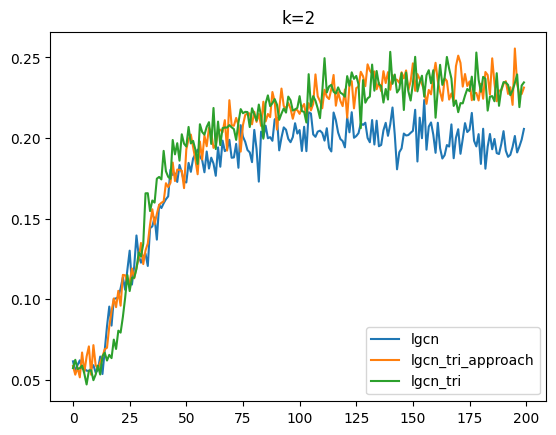

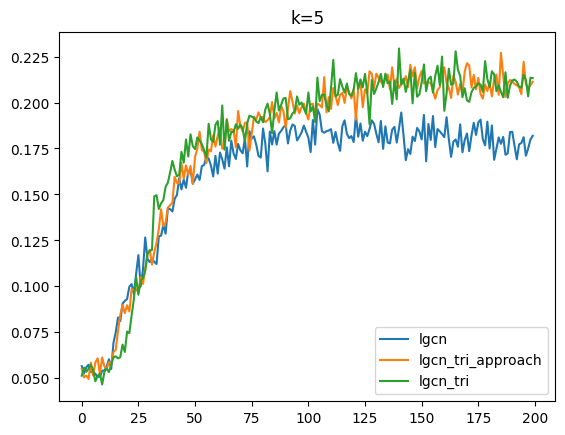

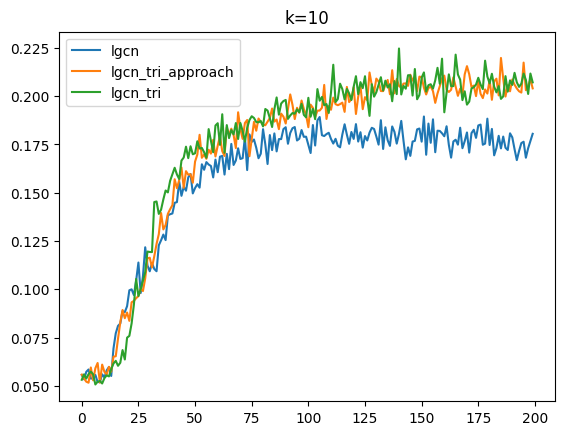

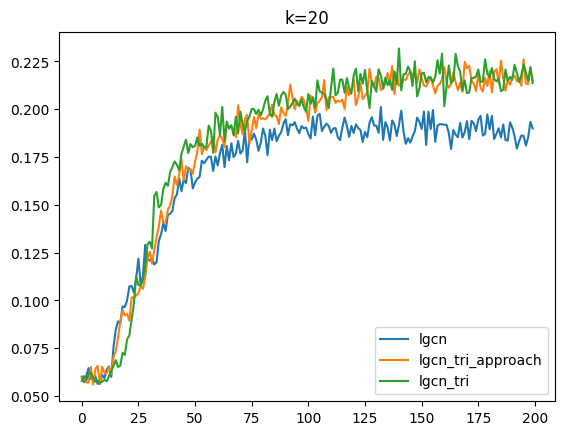

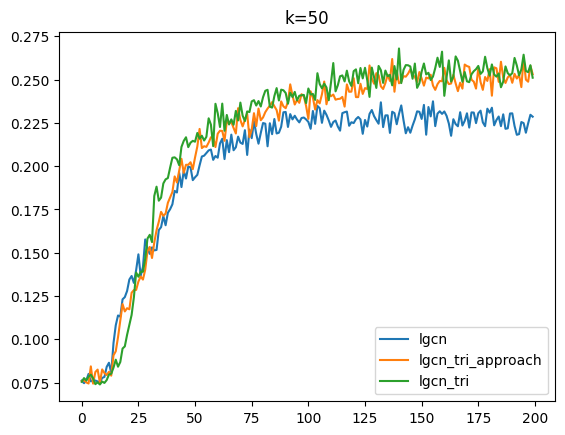

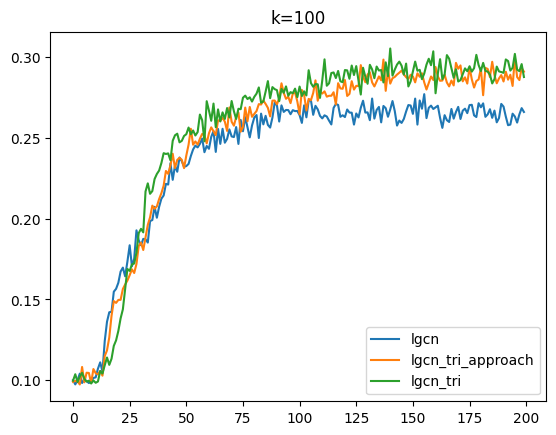

In [165]:
# 1. mean of max
a1 = np.mean([df.max().tolist()[1:] for df in lgcn_ndcg_dfs], axis=0)
a2 = np.mean([df.max().tolist()[1:] for df in lgcn_tri_approach_ndcg_dfs], axis=0)
a3 = np.mean([df.max().tolist()[1:] for df in lgcn_tri_ndcg_dfs], axis=0)
print(f'full improved rate from baseline: {a3/a1-1}')
print(f'approach improved rate from baseline: {a2/a1-1}')
print(f'full improved rate from approach: {a3/a2-1}')

# 2. draw avg(ndcg) v.s. epoch number
for k in [2,5,10,20,50,100]:
    lgcn_ndcg_mean = np.mean([df[k].tolist() for df in lgcn_ndcg_dfs], axis=0)
    plt.plot(lgcn_ndcg_mean, label='lgcn')
    
    lgcn_tri_approach_ndcg_mean = np.mean([df[k].tolist() for df in lgcn_tri_approach_ndcg_dfs], axis=0)
    plt.plot(lgcn_tri_approach_ndcg_mean, label='lgcn_tri_approach')

    lgcn_tri_ndcg_mean = np.mean([df[k].tolist() for df in lgcn_tri_ndcg_dfs], axis=0)
    plt.plot(lgcn_tri_ndcg_mean, label='lgcn_tri')
    
    
    plt.legend()
    plt.title(f'k={k}')
    plt.show()

array([0.26865515, 0.23625117, 0.23188139, 0.2402897 , 0.27642435,
       0.31313384])

In [26]:
datas1 = read_data.read_all_data_tri(params.all_para)

Reading data...
Data all read successfully!


In [49]:
np.sum([len(e) for e in datas1[5]])

54311

In [32]:
datas2 = read_data.read_all_data_tri(params.all_para)

Reading data...
Data all read successfully!


## Instacart

In [212]:
res_dir = "./experiment_result/Instacart/"
lgcn_dir = res_dir + "LGCN/"
tri_lgcn_dir = res_dir + "LGCN_tri/"
tri_lgcn_approach_dir = res_dir + "LGCN_tri_approach/"

In [214]:
assert params.all_para[2] == 'LGCN'
read_data_res = read_data.read_all_data_tri(params.all_para)
print(f'pretrained embedding size: {read_data_res[8].shape}')
print(f'interaction number: {np.sum([len(v) for v in read_data_res[0]])}')
print(params.all_para)

Reading graph_embeddings_1d from path: dataset/Instacart/graph_embeddings_1d.json
Reading data...
Data all read successfully!
pretrained embedding size: (62141, 128)
interaction number: 1058825
['0', 'Instacart', 'LGCN', 0.0005, 0.01, 1, 128, 512, 4096, 20, False, 'Validation', [2, 5, 10, 20, 50, 100], 100, 50, 128, 0.9, 1, '1D', 'InnerProduct', 'BPR', 'Regularization', 'RMSProp', False, 'None', 'Sum', 128, 'SF', False]


In [215]:
F1_max = train_model.train_model(params.all_para[:26], read_data_res, lgcn_dir + 'MBA_LGCN_20240511_1.xlsx')

F1_max: 0.030999:  10%|███████▏                                                                | 2/20 [04:15<38:25, 128.08s/it]2024-05-11 15:17:29.733403: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: INVALID_ARGUMENT: In[0] and In[1] has different ndims: [0] vs. [128,128]
	 [[{{node MatMul_72}}]]
F1_max: 0.030999:  10%|███████▏                                                                | 2/20 [04:52<43:50, 146.12s/it]


InvalidArgumentError: Graph execution error:

Detected at node 'MatMul_72' defined at (most recent call last):
    File "/Applications/Xcode.app/Contents/Developer/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/runpy.py", line 197, in _run_module_as_main
    File "/Applications/Xcode.app/Contents/Developer/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/runpy.py", line 87, in _run_code
    File "/Users/shiyimin/workspace/python_envs/tf1_dev/lib/python3.9/site-packages/ipykernel_launcher.py", line 18, in <module>
    File "/Users/shiyimin/workspace/python_envs/tf1_dev/lib/python3.9/site-packages/traitlets/config/application.py", line 1075, in launch_instance
    File "/Users/shiyimin/workspace/python_envs/tf1_dev/lib/python3.9/site-packages/ipykernel/kernelapp.py", line 739, in start
    File "/Users/shiyimin/workspace/python_envs/tf1_dev/lib/python3.9/site-packages/tornado/platform/asyncio.py", line 205, in start
    File "/Applications/Xcode.app/Contents/Developer/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/asyncio/base_events.py", line 596, in run_forever
    File "/Applications/Xcode.app/Contents/Developer/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/asyncio/base_events.py", line 1890, in _run_once
    File "/Applications/Xcode.app/Contents/Developer/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/asyncio/events.py", line 80, in _run
    File "/Users/shiyimin/workspace/python_envs/tf1_dev/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 545, in dispatch_queue
    File "/Users/shiyimin/workspace/python_envs/tf1_dev/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 534, in process_one
    File "/Users/shiyimin/workspace/python_envs/tf1_dev/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 437, in dispatch_shell
    File "/Users/shiyimin/workspace/python_envs/tf1_dev/lib/python3.9/site-packages/ipykernel/ipkernel.py", line 362, in execute_request
    File "/Users/shiyimin/workspace/python_envs/tf1_dev/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 778, in execute_request
    File "/Users/shiyimin/workspace/python_envs/tf1_dev/lib/python3.9/site-packages/ipykernel/ipkernel.py", line 449, in do_execute
    File "/Users/shiyimin/workspace/python_envs/tf1_dev/lib/python3.9/site-packages/ipykernel/zmqshell.py", line 549, in run_cell
    File "/Users/shiyimin/workspace/python_envs/tf1_dev/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3048, in run_cell
    File "/Users/shiyimin/workspace/python_envs/tf1_dev/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3103, in _run_cell
    File "/Users/shiyimin/workspace/python_envs/tf1_dev/lib/python3.9/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner
    File "/Users/shiyimin/workspace/python_envs/tf1_dev/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3308, in run_cell_async
    File "/Users/shiyimin/workspace/python_envs/tf1_dev/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3490, in run_ast_nodes
    File "/Users/shiyimin/workspace/python_envs/tf1_dev/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3550, in run_code
    File "/var/folders/t_/j13zllc171q3kmp13m2qrbfh0000gn/T/ipykernel_4193/494531525.py", line 1, in <module>
    File "/Users/shiyimin/Library/CloudStorage/OneDrive-个人/LLM Opt Pre/call/LGCN_v2/train_model.py", line 59, in train_model
    File "/Users/shiyimin/Library/CloudStorage/OneDrive-个人/LLM Opt Pre/call/LGCN_v2/model_LGCN.py", line 79, in __init__
Node: 'MatMul_72'
In[0] and In[1] has different ndims: [0] vs. [128,128]
	 [[{{node MatMul_72}}]]

Original stack trace for 'MatMul_72':
  File "/Applications/Xcode.app/Contents/Developer/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/runpy.py", line 197, in _run_module_as_main
  File "/Applications/Xcode.app/Contents/Developer/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/runpy.py", line 87, in _run_code
  File "/Users/shiyimin/workspace/python_envs/tf1_dev/lib/python3.9/site-packages/ipykernel_launcher.py", line 18, in <module>
  File "/Users/shiyimin/workspace/python_envs/tf1_dev/lib/python3.9/site-packages/traitlets/config/application.py", line 1075, in launch_instance
  File "/Users/shiyimin/workspace/python_envs/tf1_dev/lib/python3.9/site-packages/ipykernel/kernelapp.py", line 739, in start
  File "/Users/shiyimin/workspace/python_envs/tf1_dev/lib/python3.9/site-packages/tornado/platform/asyncio.py", line 205, in start
  File "/Applications/Xcode.app/Contents/Developer/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/asyncio/base_events.py", line 596, in run_forever
  File "/Applications/Xcode.app/Contents/Developer/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/asyncio/base_events.py", line 1890, in _run_once
  File "/Applications/Xcode.app/Contents/Developer/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/asyncio/events.py", line 80, in _run
  File "/Users/shiyimin/workspace/python_envs/tf1_dev/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 545, in dispatch_queue
  File "/Users/shiyimin/workspace/python_envs/tf1_dev/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 534, in process_one
  File "/Users/shiyimin/workspace/python_envs/tf1_dev/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 437, in dispatch_shell
  File "/Users/shiyimin/workspace/python_envs/tf1_dev/lib/python3.9/site-packages/ipykernel/ipkernel.py", line 362, in execute_request
  File "/Users/shiyimin/workspace/python_envs/tf1_dev/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 778, in execute_request
  File "/Users/shiyimin/workspace/python_envs/tf1_dev/lib/python3.9/site-packages/ipykernel/ipkernel.py", line 449, in do_execute
  File "/Users/shiyimin/workspace/python_envs/tf1_dev/lib/python3.9/site-packages/ipykernel/zmqshell.py", line 549, in run_cell
  File "/Users/shiyimin/workspace/python_envs/tf1_dev/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3048, in run_cell
  File "/Users/shiyimin/workspace/python_envs/tf1_dev/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3103, in _run_cell
  File "/Users/shiyimin/workspace/python_envs/tf1_dev/lib/python3.9/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner
  File "/Users/shiyimin/workspace/python_envs/tf1_dev/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3308, in run_cell_async
  File "/Users/shiyimin/workspace/python_envs/tf1_dev/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3490, in run_ast_nodes
  File "/Users/shiyimin/workspace/python_envs/tf1_dev/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3550, in run_code
  File "/var/folders/t_/j13zllc171q3kmp13m2qrbfh0000gn/T/ipykernel_4193/494531525.py", line 1, in <module>
  File "/Users/shiyimin/Library/CloudStorage/OneDrive-个人/LLM Opt Pre/call/LGCN_v2/train_model.py", line 59, in train_model
  File "/Users/shiyimin/Library/CloudStorage/OneDrive-个人/LLM Opt Pre/call/LGCN_v2/model_LGCN.py", line 79, in __init__
  File "/Users/shiyimin/workspace/python_envs/tf1_dev/lib/python3.9/site-packages/tensorflow/python/ops/weak_tensor_ops.py", line 142, in wrapper
  File "/Users/shiyimin/workspace/python_envs/tf1_dev/lib/python3.9/site-packages/tensorflow/python/util/traceback_utils.py", line 150, in error_handler
  File "/Users/shiyimin/workspace/python_envs/tf1_dev/lib/python3.9/site-packages/tensorflow/python/util/dispatch.py", line 1260, in op_dispatch_handler
  File "/Users/shiyimin/workspace/python_envs/tf1_dev/lib/python3.9/site-packages/tensorflow/python/ops/math_ops.py", line 3651, in matmul
  File "/Users/shiyimin/workspace/python_envs/tf1_dev/lib/python3.9/site-packages/tensorflow/python/ops/gen_math_ops.py", line 6257, in mat_mul
  File "/Users/shiyimin/workspace/python_envs/tf1_dev/lib/python3.9/site-packages/tensorflow/python/framework/op_def_library.py", line 796, in _apply_op_helper
  File "/Users/shiyimin/workspace/python_envs/tf1_dev/lib/python3.9/site-packages/tensorflow/python/framework/ops.py", line 2682, in _create_op_internal
  File "/Users/shiyimin/workspace/python_envs/tf1_dev/lib/python3.9/site-packages/tensorflow/python/framework/ops.py", line 1177, in from_node_def
